# 선형회귀

- 현대 중공업과 계약을 맺어 일부 선박에 대한 예측 모델을 구축하게됐습니다. 현대 중공업은 세계 최대의 선박 제조업체 중 하나로 유람선을 제작하고 있습니다.
- 당신은 선박에 필요한 선원 수를 정확하게 예측할 수 있도록 울산에있는 본사에 도착했습니다.
- 그들은 현재 새로운 선박을 건조하고 있으며 예측 모델을 만들고, 이를 사용하여 선박에 필요한 승무원 수를 예측하기를 원합니다.

- 데이터는 "cruise_ship_info.csv"라는 csv 파일에 저장됩니다. 귀하의 임무는 향후 선박에 필요한 선원 수를 예측하는 데 도움이되는 회귀 모델을 만드는 것입니다. 고객은 또한 **특정 크루즈 라인이 허용되는 승무원 수에 차이가 있음을 발견** 했으므로 분석에 포함하는 것이 가장 중요한 기능이라고 언급했습니다!

- 평가기준 : RMSE
- train_test_split: 0.25
- random_state = 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.rcParams['axes.unicode_minus'] = False

In [2]:
ci = pd.read_csv("./data/cruise_ship_info.csv")

In [3]:
ci

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [4]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [5]:
ci.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


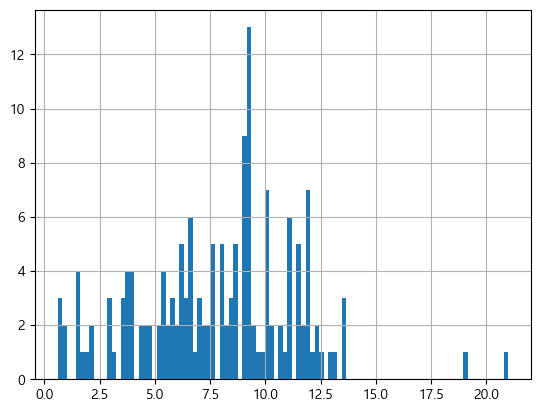

In [6]:
ci["crew"].hist(bins = 100)
plt.show()

In [7]:
# 피처 각각에 대한 히스토그램을 출력
def plot_hist(df):
    plt.rcParams["figure.figsize"] = [20, 16]
    fig = plt.figure()
    
    # df의 열 개수만큼의 subplot을 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 2, i + 1)
        plt.hist(df[df.columns[i]], bins = 50)
        ax.set_title(df.columns[i])
        
    plt.tight_layout()
    plt.show()

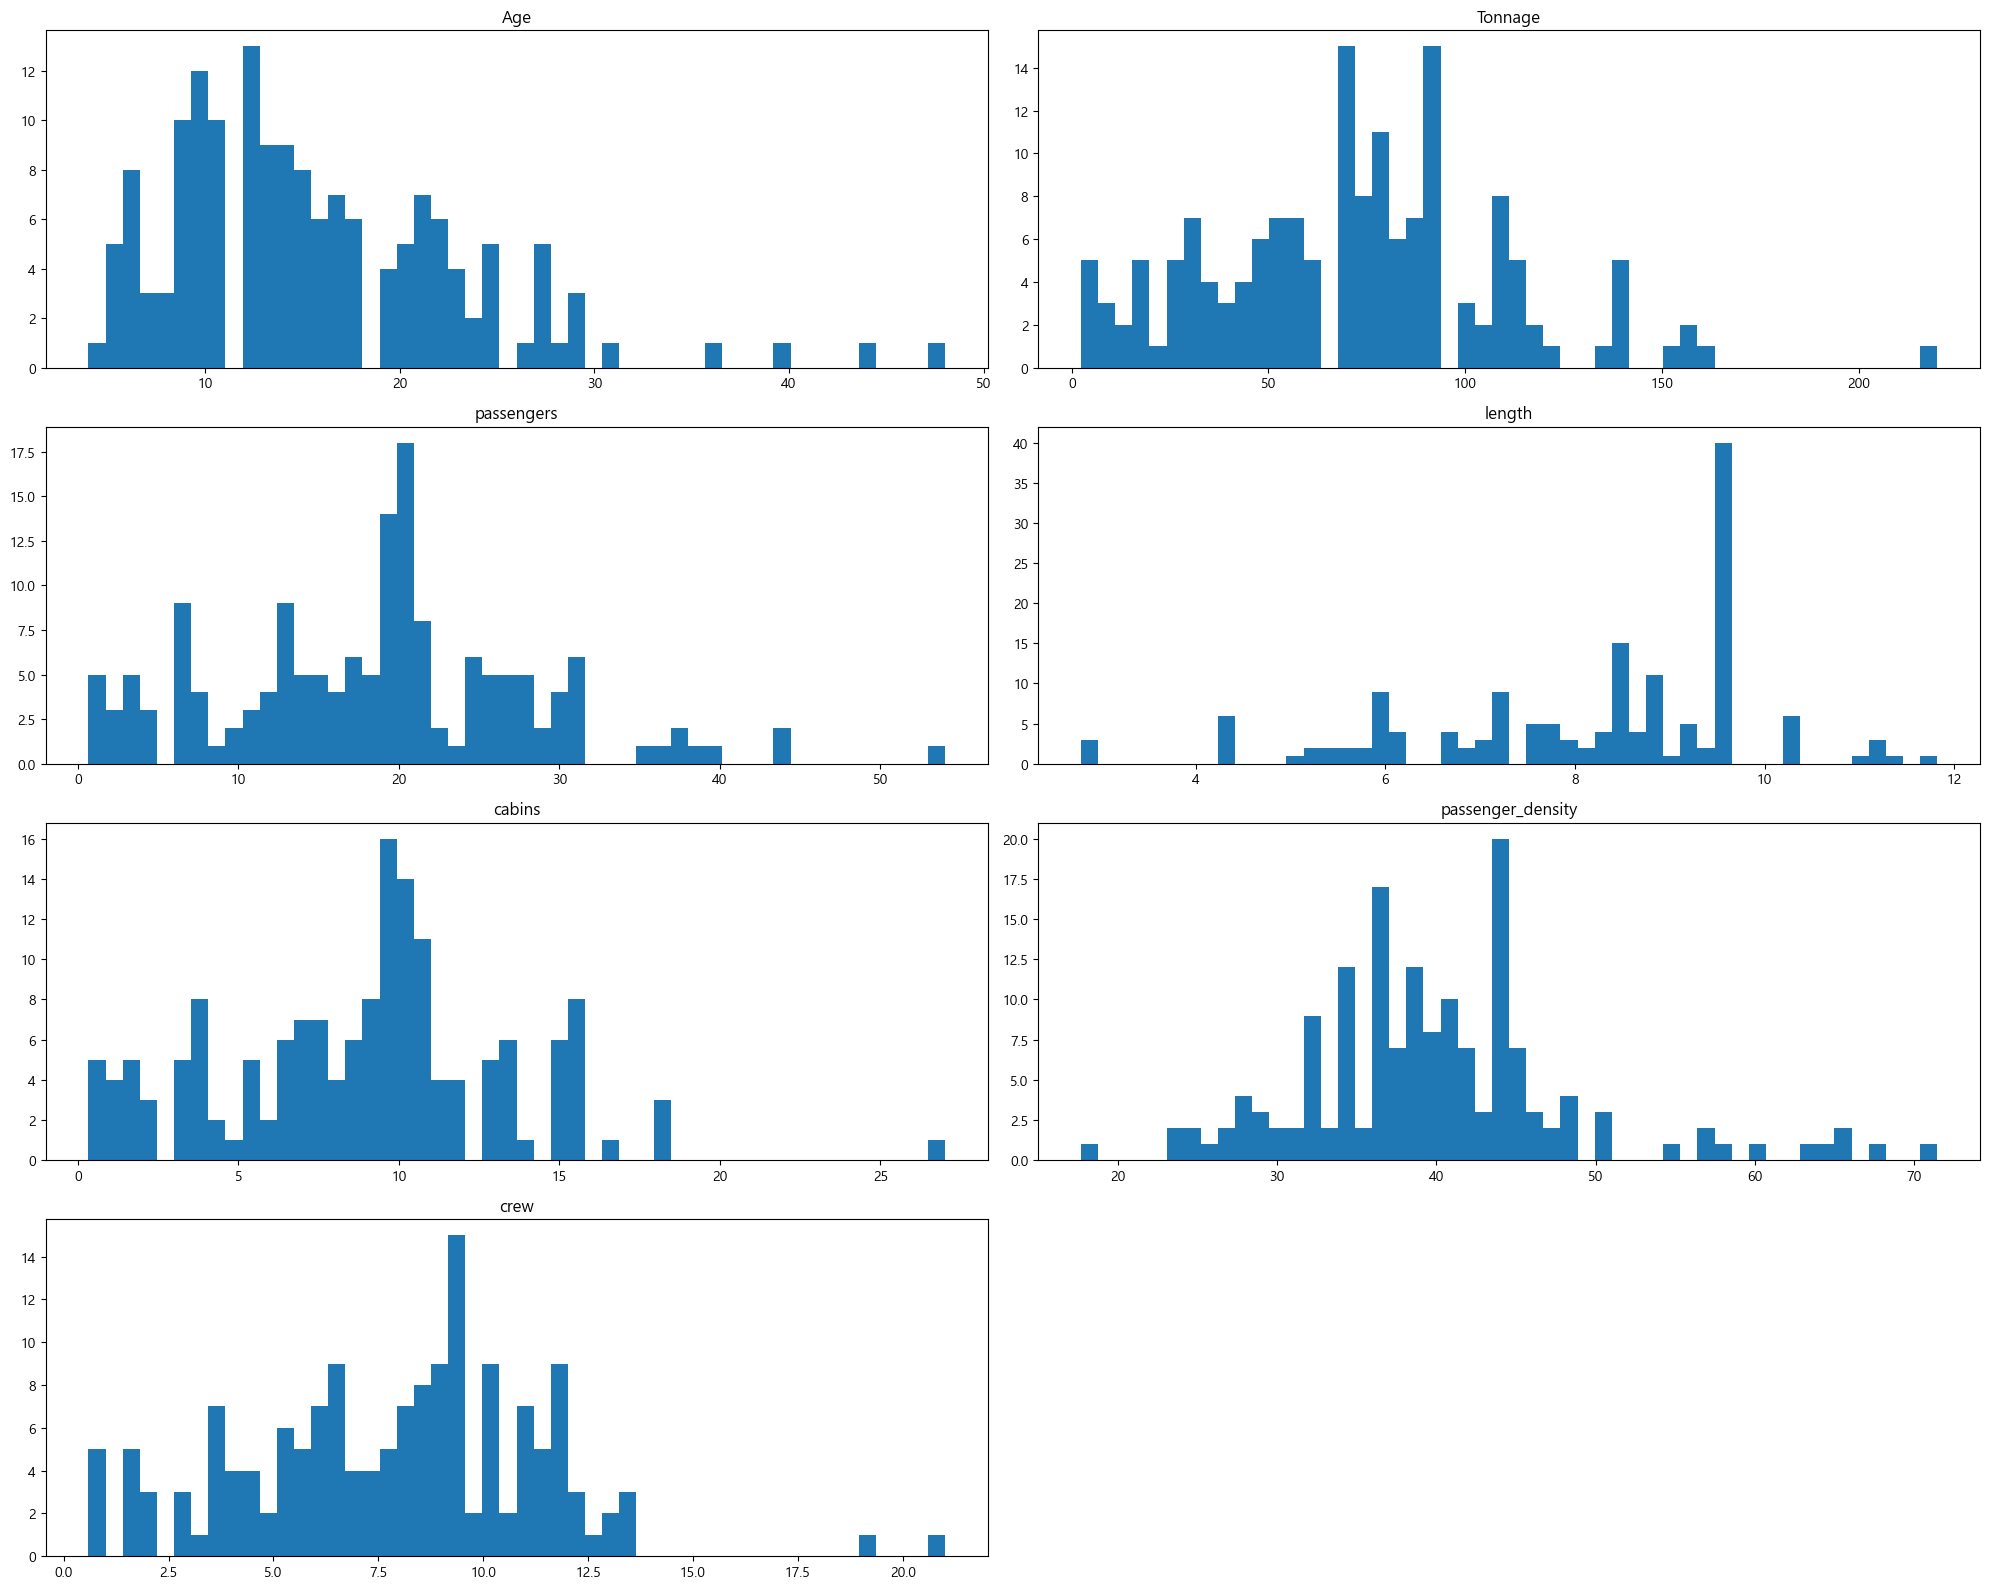

In [8]:
plot_hist(ci.iloc[:, 2:])

In [9]:
y = ci["crew"]

In [10]:
y = pd.DataFrame(y)

In [11]:
y.isna().sum()

crew    0
dtype: int64

In [12]:
ci

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...
153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [13]:
ci = ci.drop("crew", axis = 1)

In [14]:
ci["area"] = ci["passengers"] / ci["passenger_density"]

In [15]:
ci.isna().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
area                 0
dtype: int64

In [16]:
pd.concat([ci.iloc[:, 2:], y], axis = 1).corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,area,crew
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830,-0.369655,-0.530657
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846,0.795157,0.927569
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867,0.947089,0.915234
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488,0.753261,0.895857
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181,0.889150,0.950823
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000,-0.500068,-0.155509
area,-0.369655,0.795157,0.947089,0.753261,0.889150,-0.500068,1.000000,0.797649
crew,-0.530657,0.927569,0.915234,0.895857,0.950823,-0.155509,0.797649,1.000000


In [17]:
ci = ci.drop(columns = ["Age", "passenger_density"])

In [18]:
ci

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,area
0,Journey,Azamara,30.277,6.94,5.94,3.55,0.162758
1,Quest,Azamara,30.277,6.94,5.94,3.55,0.162758
2,Celebration,Carnival,47.262,14.86,7.22,7.43,0.467296
3,Conquest,Carnival,110.000,29.74,9.53,14.88,0.804001
4,Destiny,Carnival,101.353,26.42,8.92,13.21,0.688738
...,...,...,...,...,...,...,...
153,Taurus,Star,3.341,0.66,2.79,0.33,0.013038
154,Virgo,Star,76.800,19.60,8.79,9.67,0.500255
155,Spirit,Windstar,5.350,1.58,4.40,0.74,0.046663
156,Star,Windstar,5.350,1.67,4.40,0.74,0.052122


# 데이터 전처리

## 스케일링

In [19]:
# 판다스에서 scientific-notation이 아닌 float 모양으로 출력되게 설정
pd.options.mode.chained_assignment = None

In [20]:
ci.head()

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,area
0,Journey,Azamara,30.277,6.94,5.94,3.55,0.162758
1,Quest,Azamara,30.277,6.94,5.94,3.55,0.162758
2,Celebration,Carnival,47.262,14.86,7.22,7.43,0.467296
3,Conquest,Carnival,110.000,29.74,9.53,14.88,0.804001
4,Destiny,Carnival,101.353,26.42,8.92,13.21,0.688738


In [21]:
x = ci.iloc[:, 2:]

In [22]:
scale_col = ci.columns[2:].tolist()

In [23]:
scale_col

['Tonnage', 'passengers', 'length', 'cabins', 'area']

In [24]:
ci[scale_col].head()

,Tonnage,passengers,length,cabins,area
0,30.277,6.94,5.94,3.55,0.162758
1,30.277,6.94,5.94,3.55,0.162758
2,47.262,14.86,7.22,7.43,0.467296
3,110.000,29.74,9.53,14.88,0.804001
4,101.353,26.42,8.92,13.21,0.688738


In [25]:
ci_ss = StandardScaler()

In [26]:
scaled_ci = ci_ss.fit_transform(ci[scale_col])

In [27]:
scaled_ci

array([[-1.10498441e+00, -1.19395611e+00, -1.22533080e+00,
        -1.18458832e+00, -1.17431336e+00],
       [-1.10498441e+00, -1.19395611e+00, -1.22533080e+00,
        -1.18458832e+00, -1.17431336e+00],
       [-6.47310033e-01, -3.72926345e-01, -5.09362635e-01,
        -3.14095387e-01, -9.11599612e-02],
       [ 1.04321543e+00,  1.16961443e+00,  7.82736160e-01,
         1.35734078e+00,  1.10640533e+00],
       [ 8.10215117e-01,  8.25445390e-01,  4.41532582e-01,
         9.82669853e-01,  6.96448409e-01],
       [-2.47273742e-02,  2.13819677e-01,  2.34573035e-01,
         3.07364771e-01,  3.75230592e-01],
       [-2.47273742e-02,  2.13819677e-01,  2.34573035e-01,
         3.07364771e-01,  3.75230592e-01],
       [-2.47273742e-02,  2.17966292e-01,  2.34573035e-01,
         3.11851848e-01,  3.83117657e-01],
       [-2.47273742e-02,  2.13819677e-01,  2.34573035e-01,
         3.07364771e-01,  3.75230592e-01],
       [ 1.04965548e+00,  1.92222506e+00,  7.71549157e-01,
         1.35509724e+00

In [28]:
scaled_ci_df = pd.DataFrame(scaled_ci, columns = scale_col)

In [29]:
scaled_ci_df.shape

(158, 5)

In [30]:
scaled_ci_df = pd.concat([ci[["Ship_name", "Cruise_line"]], scaled_ci_df], axis = 1)

In [31]:
scaled_ci_df.head()

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,area
0,Journey,Azamara,-1.104984,-1.193956,-1.225331,-1.184588,-1.174313
1,Quest,Azamara,-1.104984,-1.193956,-1.225331,-1.184588,-1.174313
2,Celebration,Carnival,-0.647310,-0.372926,-0.509363,-0.314095,-0.091160
3,Conquest,Carnival,1.043215,1.169614,0.782736,1.357341,1.106405
4,Destiny,Carnival,0.810215,0.825445,0.441533,0.982670,0.696448


# 원핫인코딩

In [32]:
ohe = OneHotEncoder()

In [33]:
scaled_ci_df["Cruise_line"].unique()

array(['Azamara', 'Carnival', 'Celebrity', 'Costa', 'Crystal', 'Cunard',
       'Disney', 'Holland_American', 'MSC', 'Norwegian', 'Oceania',
       'Orient', 'P&O', 'Princess', 'Regent_Seven_Seas',
       'Royal_Caribbean', 'Seabourn', 'Silversea', 'Star', 'Windstar'],
      dtype=object)

In [34]:
line_arr = np.array(ci["Cruise_line"])

In [35]:
line_arr = np.reshape(line_arr, (-1, 1))

In [36]:
line_arr

array([['Azamara'],
       ['Azamara'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Carnival'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Celebrity'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Costa'],
       ['Crystal'],
       ['Crystal'],
       ['Cunard'],
       ['Cunard'],
  

In [37]:
line_name = ohe.fit_transform(line_arr)

In [38]:
line_name

<158x20 sparse matrix of type '<class 'numpy.float64'>'
	with 158 stored elements in Compressed Sparse Row format>

In [39]:
ohe.get_feature_names_out()

array(['x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American',
       'x0_MSC', 'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O',
       'x0_Princess', 'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean',
       'x0_Seabourn', 'x0_Silversea', 'x0_Star', 'x0_Windstar'],
      dtype=object)

In [40]:
ohe_line_df = pd.DataFrame(line_name.toarray(), columns = ohe.get_feature_names_out())

In [41]:
ohe_line_df.shape

(158, 20)

In [42]:
ohe_line_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
scaled_ci_df = pd.concat([scaled_ci_df, ohe_line_df], axis = 1)

In [44]:
scaled_ci_df = scaled_ci_df.drop("Cruise_line", axis = 1)

In [45]:
scaled_ci_df.head()

,Ship_name,Tonnage,passengers,length,cabins,area,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,...,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,Journey,-1.104984,-1.193956,-1.225331,-1.184588,-1.174313,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Quest,-1.104984,-1.193956,-1.225331,-1.184588,-1.174313,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Celebration,-0.647310,-0.372926,-0.509363,-0.314095,-0.091160,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Conquest,1.043215,1.169614,0.782736,1.357341,1.106405,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Destiny,0.810215,0.825445,0.441533,0.982670,0.696448,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
ci.shape

(158, 7)

In [47]:
x = scaled_ci_df.drop("Ship_name", axis = 1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2)

In [74]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [75]:
pred = lr.predict(x_test)

In [77]:
mean_squared_error(y_test, pred)

1.4535553739764429

In [51]:
rid = Ridge()
rid.fit(x_train, y_train)
rid.score(x_test, y_test)

0.8339986296854979

In [52]:
rid.score(x_train, y_train)

0.966385279235478

In [53]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 0.2, 0.3, 1, 2, 3, 4, 10, 100]

for alpha in alpha_li:
    # 모델 생성
    rid = Ridge(alpha = alpha)
    # 훈련
    rid.fit(x_train, y_train)
    # 모델 성능을 저장
    train_hist.append(rid.score(x_train, y_train))
    test_hist.append(rid.score(x_test, y_test))

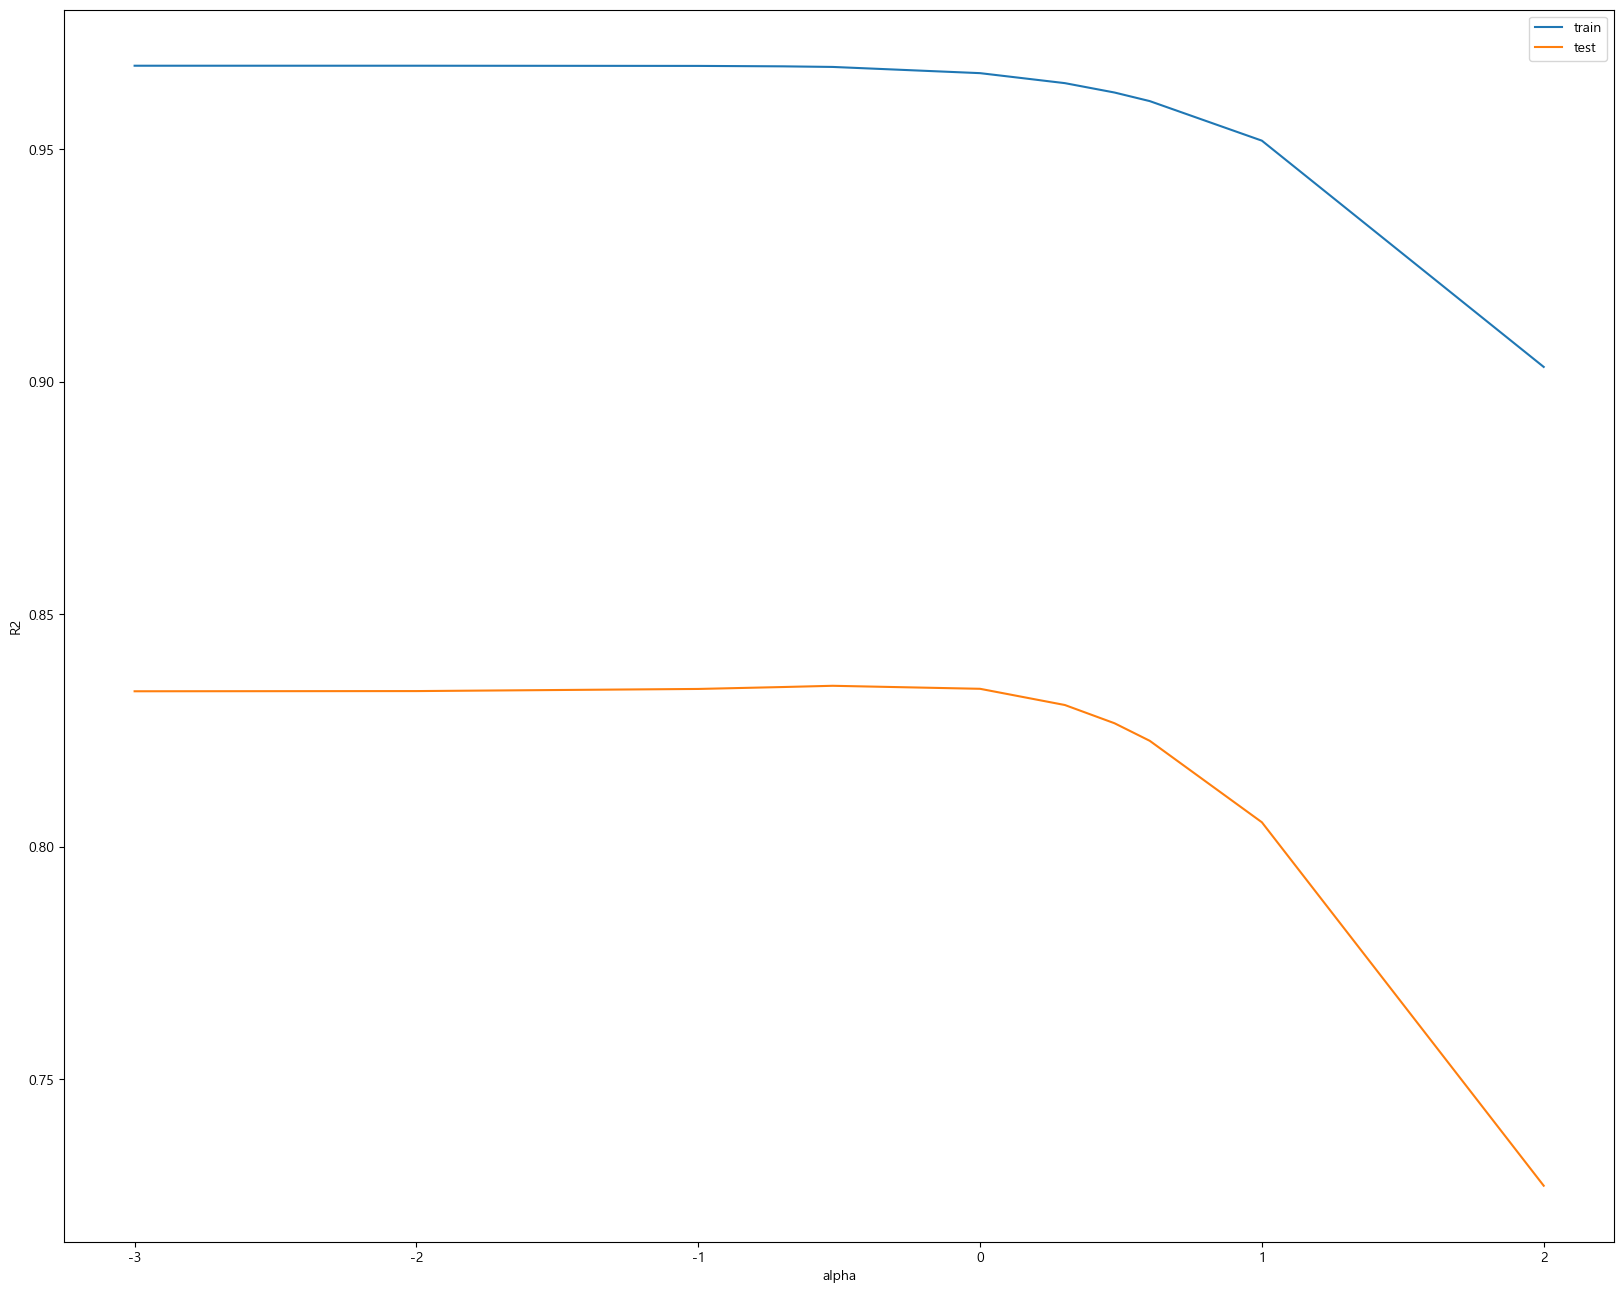

In [54]:
plt.figure()
# alpha 값을 그대로 x에 적용하면 간격이 서로 다르기 때문에
# 로그 함수로 바꾸어서 시각화
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)
plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels = ["train", "test"])
plt.show()

In [70]:
rid = Ridge(alpha = 0.1)
rid.fit(x_train, y_train)
print(rid.score(x_train, y_train))
print(rid.score(x_test, y_test))

0.9679422056465898
0.8339668985042632


In [71]:
pred = rid.predict(x_test)

In [72]:
mse = mean_squared_error(y_test, pred)

In [73]:
mse

1.4491484906636203